In [3]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

#with open('/Users/zhouji/Google Drive/RWTH/Data/RMH_sample_9.json') as f:
    #data = json.load(f)
with open('/Users/darksky_thasya/Documents/Dokumente - Arysthasyas MacBook Air/george-works/MCMCPlot/gpCN_sample_9.json') as f:
    data = json.load(f)
data = json.loads(data)
samples_RMH = np.asarray(data['samples_gpCN'])

/Users/darksky_thasya/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:196: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(0, a.mean())
/Users/darksky_thasya/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/darksky_thasya/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/darksky_thasya/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


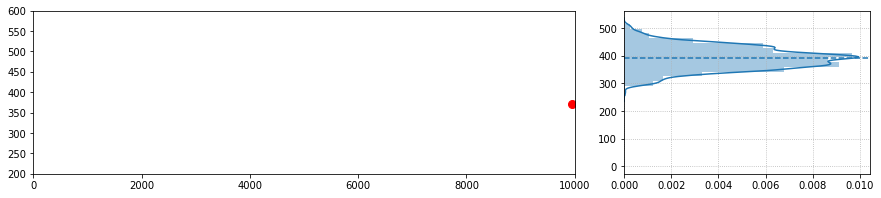

In [6]:
fig = plt.figure(figsize=(15,3))

ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2,xlim=(0, 10000), ylim=(200,600))
ax2 = plt.subplot2grid((1, 3), (0, 2), colspan=1, ylim=(200,600))

line1, = ax1.plot([], [],linewidth=2)
#dot1, = ax1.scatter([], [])
dot1, = ax1.plot([], [],'ro',markersize=8, animated=True)

def init():
    line1.set_data([], [])
    p = sns.distplot(samples_RMH[:0, 0],bins=15,kde=False,vertical = True,ax = ax2)
    return line1,p

def animate(num):
    line1.set_data(np.arange(num),samples_RMH[:num, 0])
    dot1.set_data(num,samples_RMH[num, 0])
    ax2.clear()
    
    p = sns.distplot(samples_RMH[:num, 0],bins=15,kde=True,vertical = True,ax = ax2)
    p.axhline(y=np.mean(samples_RMH[:num, 0]),linestyle="--")
    p.grid(linestyle=':')
    
    
    return line1,dot1,p


time = np.arange(10000)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=time[::50], interval=0.1, blit=False)

writer = animation.writers['ffmpeg'](fps=10)
dpi=200

anim.save('test.mp4', writer=writer,dpi=dpi)
plt.show()

In [ ]:
# kde plot
p = sns.distplot(samples_RMH[:, 0],bins=15,kde=True,vertical = True)

In [ ]:
class chainAnimation():
    def __init__(self,data):
        self.data = data

    def Plot(self,):    
        
        self.fig = plt.figure(figsize=(15,3))
        
        ymin = np.min(self.data)-50
        ymax = np.max(self.data)+50
        
        self.ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2,xlim=(0, self.data.shape[0]), ylim=(ymin,ymax))
        self.ax2 = plt.subplot2grid((1, 3), (0, 2), colspan=1, ylim=(ymin,ymax))

        line1, = self.ax1.plot([], [])
        line1.set_data(np.arange(self.data.shape[0]),self.data)
        p = sns.distplot(self.data[:],bins=15,kde=False,vertical = True,ax = self.ax2)
        p.axhline(y=np.mean(self.data),linestyle="--",label = 'mean')
        plt.legend()
        
        return line1,p
        
    def init(self):
        self.line1.set_data([], [])
        p = sns.distplot(self.data,bins=15,kde=False,vertical = True,ax = self.ax2)
        return self.line1,p

    def animate(self,num):
        self.line1.set_data(np.arange(num),self.data[:num])
        self.ax2.clear()

        p = sns.distplot(self.data[:num],bins=15,kde=False,vertical = True,ax = self.ax2)
        p.axhline(y=np.mean(samples_RMH[:num, 0]),linestyle="--")

        return self.line1,p

    def saveGIF(self,name = 'test'):
        
        self.fig = plt.figure(figsize=(15,3))
        
        ymin = np.min(self.data)-50
        ymax = np.max(self.data)+50
        
        self.ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2,xlim=(0, self.data.shape[0]), ylim=(ymin,ymax))
        self.ax2 = plt.subplot2grid((1, 3), (0, 2), colspan=1, ylim=(ymin,ymax))

        self.line1, = self.ax1.plot([], [])
        time = np.arange(10000)

        anim = animation.FuncAnimation(self.fig, self.animate,init_func=self.init,
                                       frames=time[::50], interval=0.1, blit=False)

        anim.save(name+'test2.gif', dpi = 200,bitrate=500 ,writer='ImageMagick')



In [ ]:
data = samples_RMH[:,0]
ca = chainAnimation(data)
ca.Plot()

In [ ]:
ca.saveGIF(name='Plot')

In [ ]:
fig

In [ ]:
import sys
#sys.path.append("/Users/zhouji/Google Drive/RWTH/")
sys.path.append("/Users/darksky_thasya/Documents/Dokumente - Arysthasyas MacBook Air/george-works/MCMCPlot/")
from MCMCAnim import chainAnimation

In [ ]:
with open('/Users/darksky_thasya/Documents/Dokumente - Arysthasyas MacBook Air/george-works/MCMCPlot/gpCN_sample_9.json') as f:
    data = json.load(f)
data = json.loads(data)
samples_RMH = np.asarray(data['samples_RMH'])

with open('/Users/darksky_thasya/Documents/Dokumente - Arysthasyas MacBook Air/george-works/MCMCPlot/gpCN_sample_9.json') as f:
    data = json.load(f)
data = json.loads(data)
samples_gpCN = np.asarray(data['samples_gpCN'])

In [ ]:
RMH = samples_RMH[:,0]
ca_RMH = chainAnimation(RMH)
ca_RMH.Plot()

gpCN = samples_gpCN[:,0]
ca_gpCN = chainAnimation(gpCN)
ca_gpCN.Plot()

In [ ]:
ca_RMH.saveGIF('RMH')
ca_gpCN.saveGIF('gpCN')